In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../data/stocks_prices.csv')

In [3]:
df.head()

,date,volume,open,high,low,close,adjclose,ticker
0,2018-06-15,3696200,59.630001,60.080002,59.369999,60.009998,60.009998,TMUS
1,2018-07-26,23518700,43.580002,43.830002,43.220001,43.529999,41.350727,CSCO
2,2018-04-13,2828300,108.849998,109.459999,108.519997,109.260002,101.975182,PEP
3,2018-03-14,21141100,45.340000,45.759998,45.090000,45.279999,42.340096,CSCO
4,2019-05-21,2506000,277.089996,279.779999,274.649994,275.329987,275.329987,AVGO


In [4]:
df["date"] = pd.to_datetime(df["date"])

In [5]:
df.tail()

,date,volume,open,high,low,close,adjclose,ticker
5025,2018-06-26,3546400,59.709999,59.759998,58.820000,59.700001,59.700001,TMUS
5026,2019-04-17,26093600,57.180000,57.320000,56.290001,56.310001,54.613140,CSCO
5027,2018-10-25,6795200,66.339996,67.000000,65.099998,66.320000,66.320000,TMUS
5028,2018-04-27,7074400,316.250000,317.450012,306.500000,311.760010,311.760010,NFLX
5029,2018-06-08,2491500,57.330002,57.970001,56.980000,57.799999,57.799999,TMUS


In [6]:
df.shape

(5030, 8)

In [7]:
df.columns.to_list()

['date', 'volume', 'open', 'high', 'low', 'close', 'adjclose', 'ticker']

In [8]:
# all unique tickers and their count
df["ticker"].unique(), df["ticker"].nunique()

(array(['TMUS', 'CSCO', 'PEP', 'AVGO', 'AMD', 'AAPL', 'MSFT', 'NFLX',
        'TSLA', 'AMZN'], dtype=object),
 10)

In [9]:
# check for missing values
df.isnull().sum()

date        0
volume      0
open        0
high        0
low         0
close       0
adjclose    0
ticker      0
dtype: int64

In [10]:
df.dtypes

date        datetime64[ns]
volume               int64
open               float64
high               float64
low                float64
close              float64
adjclose           float64
ticker              object
dtype: object

In [11]:
# get summary statistics
df.describe()

,volume,open,high,low,close,adjclose
count,5.030000e+03,5030.000000,5030.000000,5030.000000,5030.000000,5030.000000
mean,1.922675e+07,317.323750,320.845511,313.372413,317.270793,315.987232
std,2.571300e+07,480.948808,485.342205,475.482149,480.632483,481.144556
min,4.701000e+05,9.080000,9.770000,9.040000,9.530000,9.530000
25%,4.088975e+06,68.797499,69.420002,68.080002,68.774998,68.774998
50%,8.508150e+06,153.040001,155.014999,151.415001,153.555000,151.020363
75%,2.426970e+07,292.687500,297.452492,288.190010,291.955002,291.955002
max,3.250584e+08,2038.109985,2050.500000,2013.000000,2039.510010,2039.510010


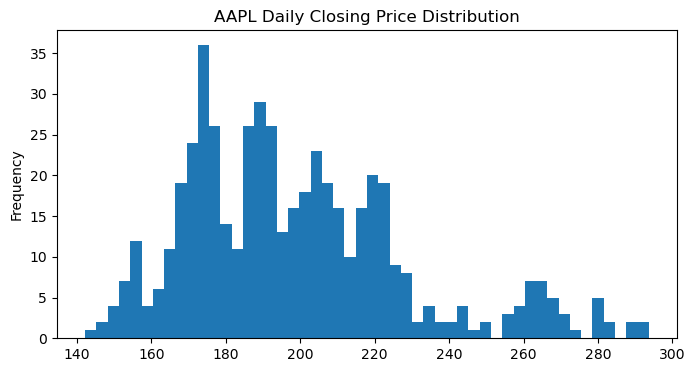

In [12]:
# Visualize the distribution of closing prices for a specific ticker
import matplotlib.pyplot as plt

df[df["ticker"] == "AAPL"]["close"].plot(
    title="AAPL Daily Closing Price Distribution",
    kind="hist",
    bins=50,
    figsize=(8,4)
)
plt.show()


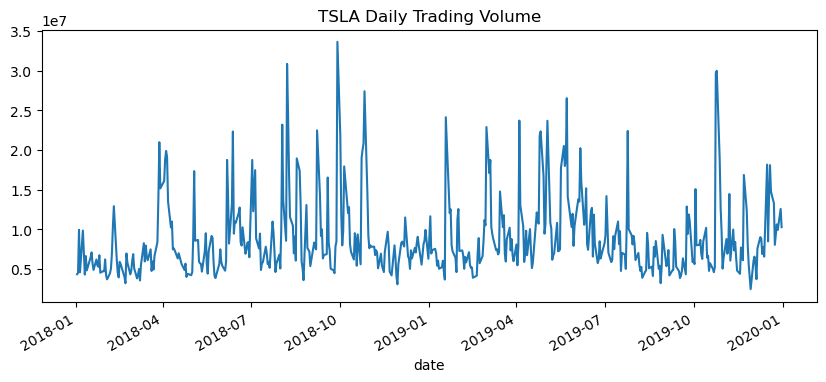

In [13]:
# Visualize the trading volume over time for a specific ticker
df[df["ticker"] == "TSLA"].set_index("date")["volume"].plot(
    title="TSLA Daily Trading Volume",
    figsize=(10,4)
)
plt.show()


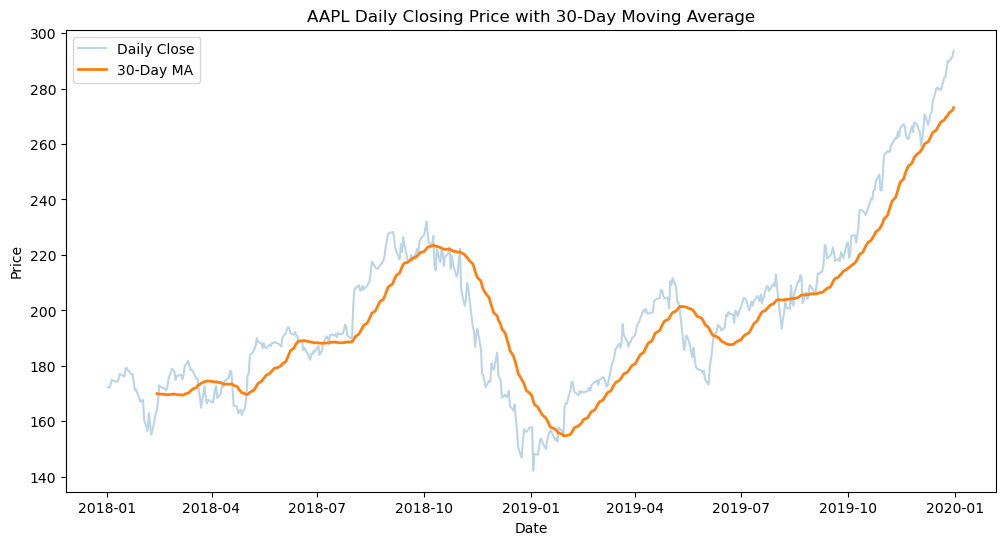

In [14]:
# Calculate and plot the 30-day moving average of closing prices for a specific ticker
df = df[df["ticker"] == "AAPL"].sort_values("date")

df["close_30d_ma"] = df["close"].rolling(window=30).mean()

plt.figure(figsize=(12,6))
plt.plot(df["date"], df["close"], alpha=0.3, label="Daily Close")
plt.plot(df["date"], df["close_30d_ma"], linewidth=2, label="30-Day MA")

plt.title("AAPL Daily Closing Price with 30-Day Moving Average")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

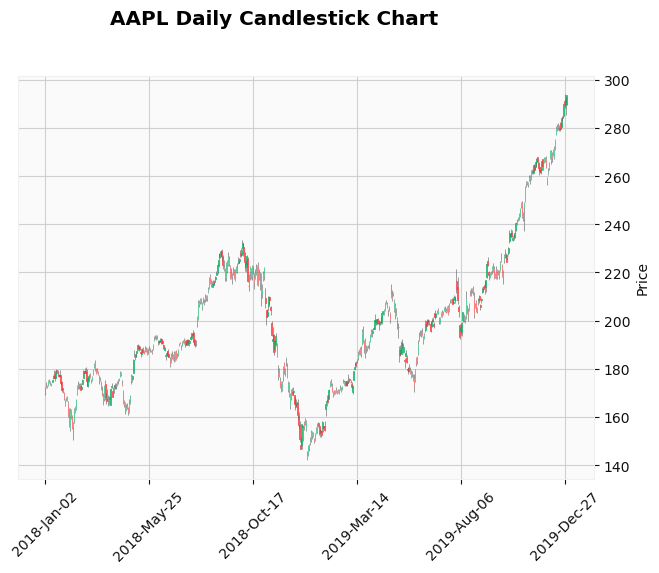

In [15]:
import mplfinance as mpf

df.set_index("date", inplace=True)

mpf.plot(
    df,
    type="candle",
    style="yahoo",
    title="AAPL Daily Candlestick Chart",
    volume=False
)

In [16]:
# Load the processed data for further analysis
df = pd.read_csv("../output/result_AAPL.csv", parse_dates=["date"])

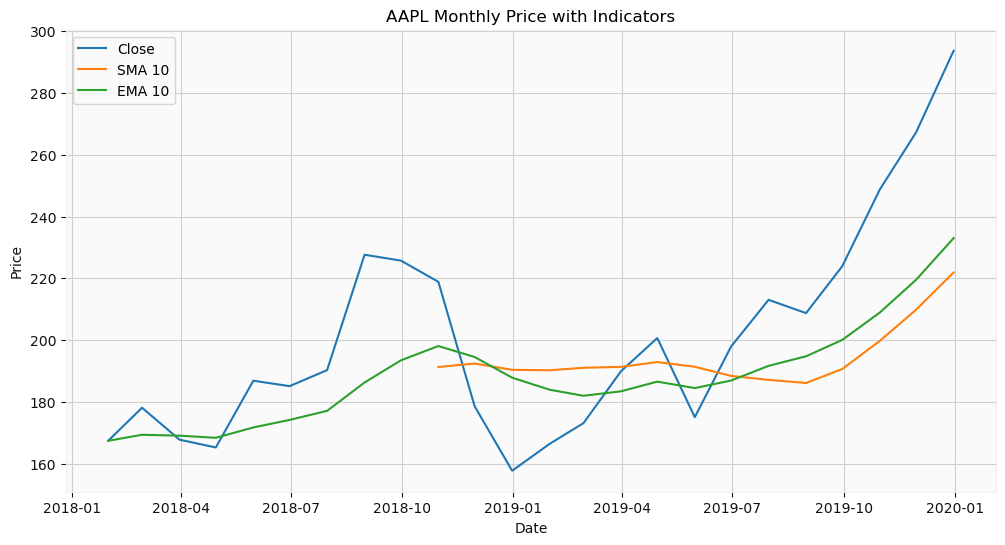

In [17]:
plt.figure(figsize=(12,6))
plt.plot(df["date"], df["close"], label="Close")
plt.plot(df["date"], df["SMA_10"], label="SMA 10")
plt.plot(df["date"], df["EMA_10"], label="EMA 10")

plt.title("AAPL Monthly Price with Indicators")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

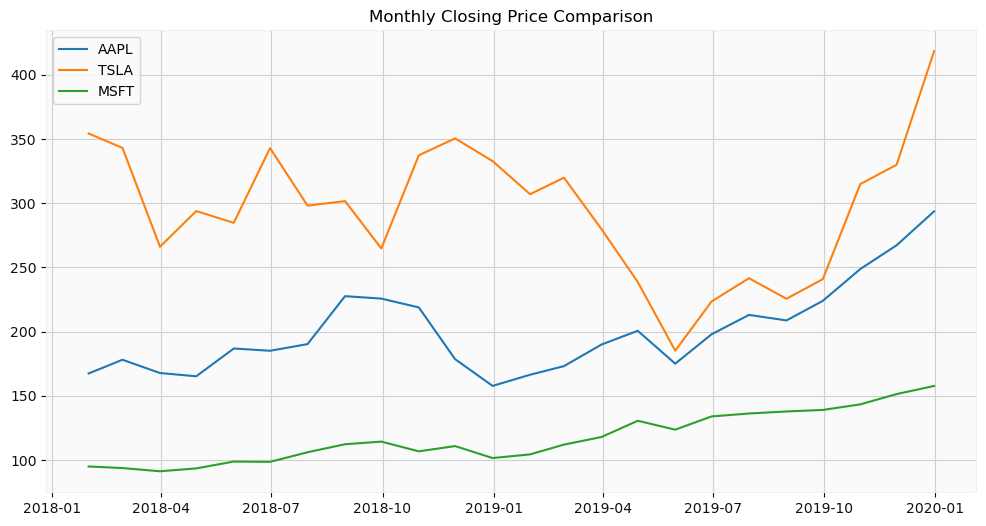

In [18]:
symbols = ["AAPL", "TSLA", "MSFT"]

plt.figure(figsize=(12,6))
for sym in symbols:
    temp = pd.read_csv(f"../output/result_{sym}.csv", parse_dates=["date"])
    plt.plot(temp["date"], temp["close"], label=sym)

plt.title("Monthly Closing Price Comparison")
plt.legend()
plt.show()
